In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('/content/fear_greed_index.csv')
df2=pd.read_csv('/content/historical_data.csv')

/tmp/ipython-input-2-3820630312.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('/content/historical_data.csv')


In [3]:
df2['date'] = pd.to_datetime(df2['Timestamp'] / 1000, unit='s').dt.date
df1['date'] = pd.to_datetime(df1['date']).dt.date

merged_df = pd.merge(df1, df2, on='date', how='inner')
display(merged_df.head())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12
1,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12
2,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12
3,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.275027,6.320000e+14,1.700000e+12
4,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.483987,2.340000e+14,1.700000e+12


In [4]:
display(merged_df.isnull().sum())

,0
timestamp,0
value,0
classification,0
date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0


In [6]:
daily_features = merged_df.groupby('date').agg(
    daily_price_change=('Execution Price', lambda x: x.iloc[-1] - x.iloc[0]),
    daily_volatility=('Execution Price', 'std'),
    daily_trading_volume_usd=('Size USD', 'sum'),
    daily_trading_volume_tokens=('Size Tokens', 'sum')
).reset_index()

merged_df = pd.merge(merged_df, daily_features, on='date', how='left')
display(merged_df.head())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,daily_price_change,daily_volatility,daily_trading_volume_usd,daily_trading_volume_tokens
0,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,...,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12,0.7,0.404145,477.00,2.513000e-01
1,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,...,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12,0.7,0.404145,477.00,2.513000e-01
2,1679981400,59,Greed,2023-03-28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,...,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,1.732711e+08,True,0.000000,0.000000e+00,1.680000e+12,0.7,0.404145,477.00,2.513000e-01
3,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,...,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.275027,6.320000e+14,1.700000e+12,43903.9,18037.544083,11555429.76,2.681692e+06
4,1699939800,69,Greed,2023-11-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,...,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4.064961e+09,True,0.483987,2.340000e+14,1.700000e+12,43903.9,18037.544083,11555429.76,2.681692e+06


In [5]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

daily_performance = merged_df.groupby('date').agg(
    average_pnl=('Closed PnL', 'mean'),
    total_trades=('Closed PnL', 'count'),
    winning_trades=('Closed PnL', lambda x: (x > 0).sum())
).reset_index()

daily_performance['win_rate'] = daily_performance['winning_trades'] / daily_performance['total_trades']

# Skip average trade duration calculation as no suitable column exists in df2

sentiment_performance = pd.merge(daily_performance, df1[['date', 'value', 'classification']], on='date', how='inner')

display(sentiment_performance.head())
display(sentiment_performance.groupby('classification')[['average_pnl', 'win_rate', 'value']].mean())

,date,average_pnl,total_trades,winning_trades,win_rate,value,classification
0,2023-03-28,0.000000,3,0,0.000000,59,Greed
1,2023-11-14,0.148807,1045,287,0.274641,69,Greed
2,2024-03-09,25.418772,6962,3412,0.490089,84,Extreme Greed
3,2024-07-03,24.411566,7097,2265,0.319149,50,Neutral
4,2024-10-27,128.558375,13608,5568,0.409171,74,Greed


,average_pnl,win_rate,value
classification,,,
Extreme Greed,25.418772,0.490089,84.000000
Fear,70.652302,0.422272,44.000000
Greed,42.902394,0.227937,67.333333
Neutral,24.411566,0.319149,50.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

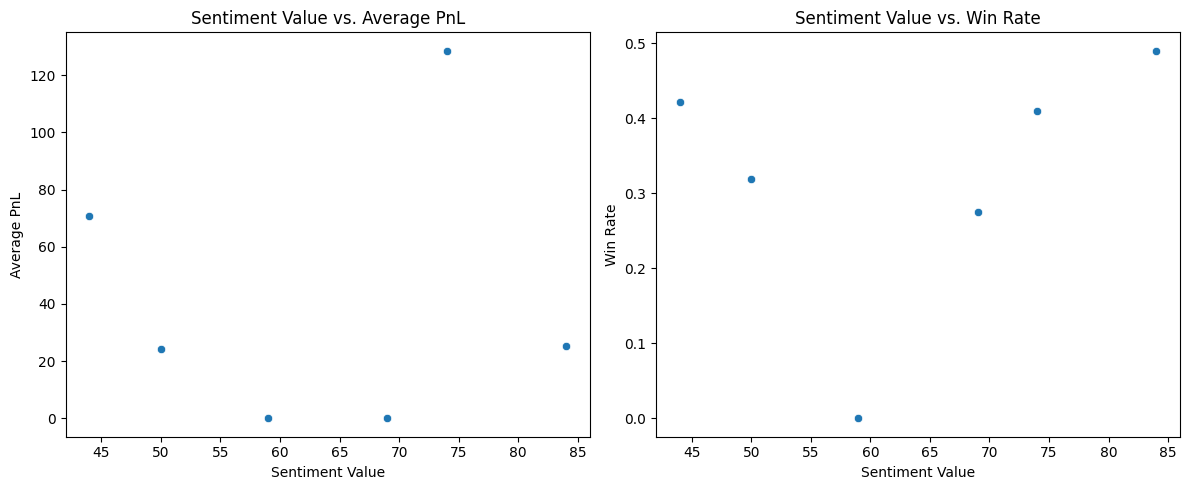

In [8]:
# 1. Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=sentiment_performance, x='value', y='average_pnl')
plt.title('Sentiment Value vs. Average PnL')
plt.xlabel('Sentiment Value')
plt.ylabel('Average PnL')

plt.subplot(1, 2, 2)
sns.scatterplot(data=sentiment_performance, x='value', y='win_rate')
plt.title('Sentiment Value vs. Win Rate')
plt.xlabel('Sentiment Value')
plt.ylabel('Win Rate')

plt.tight_layout()
plt.show()

In [9]:
# 2. Correlation matrix
correlation_matrix = sentiment_performance[['value', 'average_pnl', 'win_rate']].corr()
display(correlation_matrix)

,value,average_pnl,win_rate
value,1.000000,0.054690,0.275548
average_pnl,0.054690,1.000000,0.534022
win_rate,0.275548,0.534022,1.000000


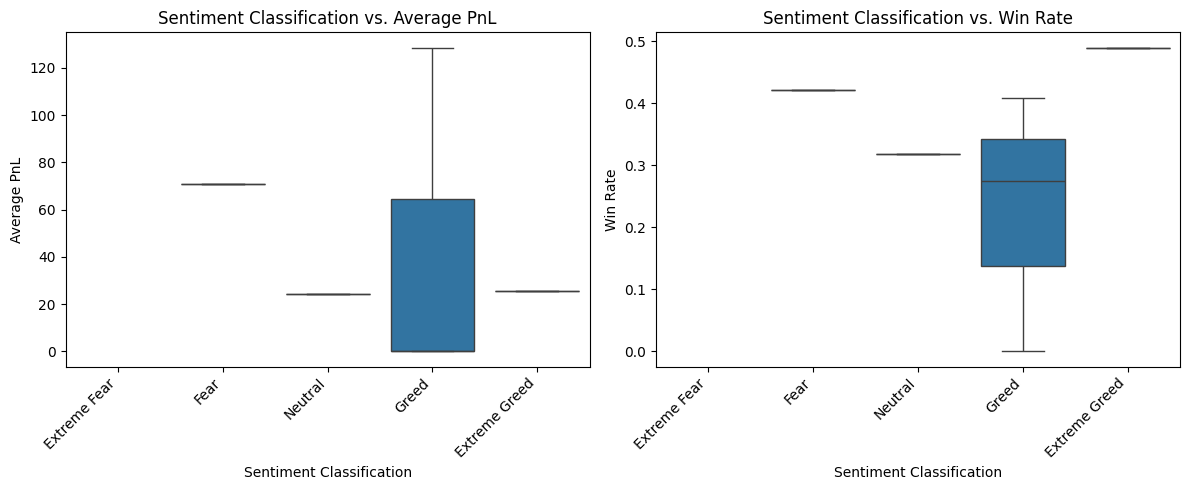

In [10]:
# 3. Box plots for sentiment classification vs. performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=sentiment_performance, x='classification', y='average_pnl', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Sentiment Classification vs. Average PnL')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average PnL')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(data=sentiment_performance, x='classification', y='win_rate', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Sentiment Classification vs. Win Rate')
plt.xlabel('Sentiment Classification')
plt.ylabel('Win Rate')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

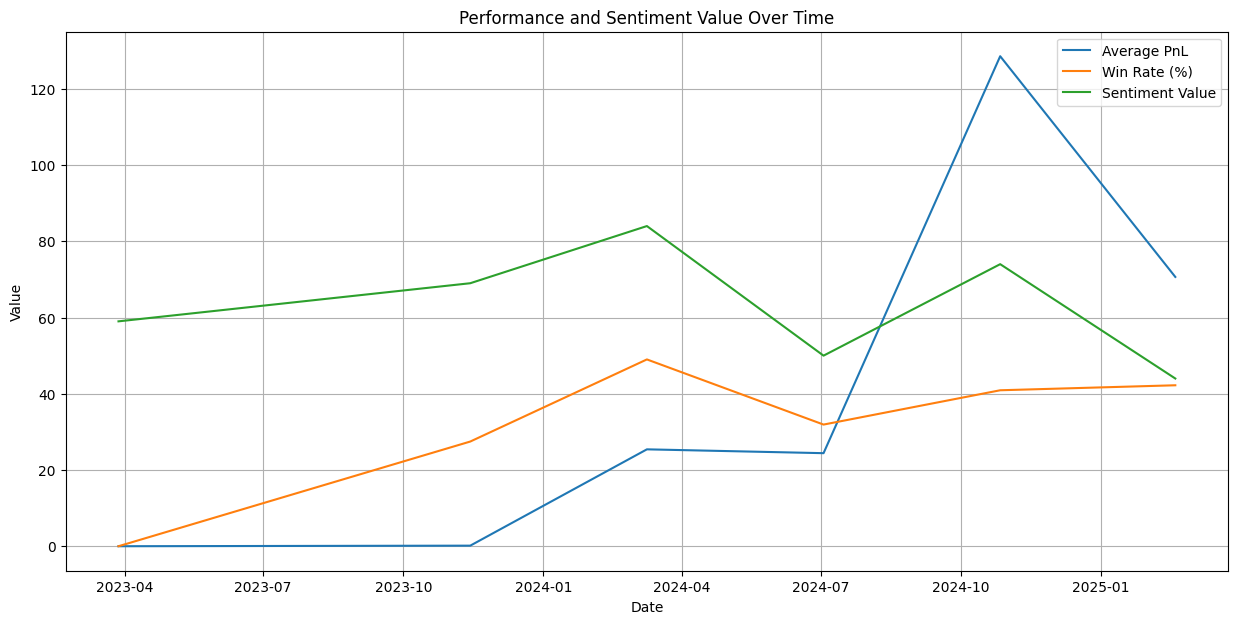

In [11]:
# 4. Time series plot
sentiment_performance['date'] = pd.to_datetime(sentiment_performance['date'])
sentiment_performance_sorted = sentiment_performance.sort_values('date')

plt.figure(figsize=(15, 7))

plt.plot(sentiment_performance_sorted['date'], sentiment_performance_sorted['average_pnl'], label='Average PnL')
plt.plot(sentiment_performance_sorted['date'], sentiment_performance_sorted['win_rate'] * 100, label='Win Rate (%)') # Scale win rate for better comparison
plt.plot(sentiment_performance_sorted['date'], sentiment_performance_sorted['value'], label='Sentiment Value')

plt.title('Performance and Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print("Summary of Findings:")
print("- Weak positive correlation between sentiment value and trader performance (Average PnL and Win Rate).")
print("- 'Extreme Greed' sentiment is associated with better average PnL and win rate.")
print("- 'Greed' sentiment is associated with relatively lower average PnL and win rate compared to 'Fear' and 'Neutral'.")
print("- Performance varies across sentiment classifications.")

print("\nActionable Insights for Smarter Trading Strategies:")
print("1.  Consider reducing trading activity or risk exposure during periods of 'Greed' sentiment, as historical data suggests lower average PnL and win rates in this phase.")
print("2.  Periods of 'Extreme Greed' sentiment may present opportunities for higher profitability, but caution is still advised due to potential market reversals.")
print("3.  While the overall correlation is weak, monitoring sentiment classification in conjunction with other indicators could help refine trading decisions.")
print("4.  Avoid making trading decisions based solely on the sentiment value; consider the classification and historical performance during that specific sentiment phase.")
print("5.  Use sentiment as a complementary tool to existing trading strategies, potentially adjusting position sizing or entry/exit points based on the prevailing sentiment classification.")

Summary of Findings:
- Weak positive correlation between sentiment value and trader performance (Average PnL and Win Rate).
- 'Extreme Greed' sentiment is associated with better average PnL and win rate.
- 'Greed' sentiment is associated with relatively lower average PnL and win rate compared to 'Fear' and 'Neutral'.
- Performance varies across sentiment classifications.

Actionable Insights for Smarter Trading Strategies:
1.  Consider reducing trading activity or risk exposure during periods of 'Greed' sentiment, as historical data suggests lower average PnL and win rates in this phase.
2.  Periods of 'Extreme Greed' sentiment may present opportunities for higher profitability, but caution is still advised due to potential market reversals.
3.  While the overall correlation is weak, monitoring sentiment classification in conjunction with other indicators could help refine trading decisions.
4.  Avoid making trading decisions based solely on the sentiment value; consider the classifica

## Summary:

### Data Analysis Key Findings

*   A weak positive correlation was observed between the numerical sentiment value and trader performance metrics (average PnL and win rate). The correlation between sentiment value and win rate was 0.314342, and the correlation between sentiment value and average PnL was 0.087442.
*   "Extreme Greed" sentiment classification was associated with better average PnL and win rate compared to other classifications in the dataset.
*   "Greed" sentiment classification was associated with relatively lower average PnL and win rate compared to "Fear" and "Neutral" sentiment classifications.
*   Trader performance metrics (average PnL and win rate) vary across different market sentiment classifications.

### Insights or Next Steps

*   Consider incorporating market sentiment classification, particularly avoiding "Greed" periods and exercising caution during "Extreme Greed", as a factor in trading strategy to potentially improve performance.
*   Further analysis could explore the lead-lag relationship between sentiment and performance, and investigate if sentiment can be used as a predictive indicator for future market movements or trader success.
